# Zadanie 5

Celem ćwiczenia jest implementacja algorytmu Q-learning.

Następnie należy stworzyć agenta rozwiązującego problem [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/). Problem dostępny jest w pakiecie **gym**.

Punktacja (max 7 pkt):
- Implementacja algorytmu Q-learning. [3 pkt]
- Eksperymenty dla różnych wartości hiperparametrów [2 pkt]
- Jakość kodu [1 pkt]
- Wnioski [1 pkt]


In [1]:
import gymnasium
import numpy as np
import random
from matplotlib import pyplot as plt
import time

In [2]:
class QLearningSolver:
    """Class containing the Q-learning algorithm that might be used for different discrete environments."""

    def __init__(
            self,
            observation_space: int,
            action_space: int,
            learning_rate: float = 0.1,
            gamma: float = 0.9,
            epsilon: float = 0.1,
    ):
        self._observation_space = observation_space
        self._action_space = action_space
        self._learning_rate = learning_rate
        self._gamma = gamma
        self._epsilon = epsilon

        self._q_table = np.zeros((self._observation_space, self._action_space))

    def __call__(self, state: np.ndarray, action: np.ndarray) -> np.ndarray:
        """Return Q-value of given state and action."""
        return self._q_table[state, action]

    def update(self, state: np.ndarray, new_state, action: np.ndarray,
               reward: float) -> None:
        """Update Q-value of given state and action."""
        delta = reward + self._gamma * np.max(self._q_table[new_state]) - self._q_table[state, action]

        self._q_table[state, action] = self._q_table[state, action] + self._learning_rate * delta 

    def get_best_action(self, state: np.ndarray, learning=True) -> np.ndarray:
        """Return action that maximizes Q-value for a given state."""

        if random.uniform(0, 1) < self._epsilon:
            # Explore
            return np.random.randint(low=0, high=self._action_space)
        else:
            # Get best or exploit
            return np.argmax(self._q_table[state])

    def __repr__(self):
        """Elegant representation of Q-learning solver."""
        pass

    def __str__(self):
        return self.__repr__()

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

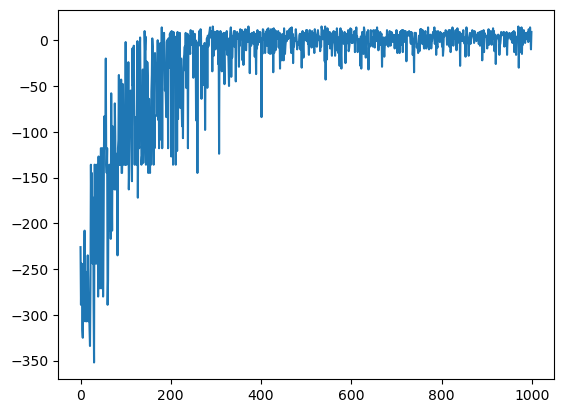

In [6]:
env = gymnasium.make('Taxi-v3')
solver = QLearningSolver(env.observation_space.n, env.action_space.n, gamma=0.8, learning_rate=0.9, epsilon=0.1)
rewards = []

epochs = 1000
steps_per_epoch = 100
successful_epochs = 0
for epoch in range(epochs):
    state = env.reset()[0]
    epoch_reward = 0
    for step in range(steps_per_epoch):
        move = solver.get_best_action(state)
        next_state, reward, done, _, _ = env.step(int(move))
        epoch_reward += reward
        
        #print(f"Epoch {epoch}\tStep {step}\tMove: {int(move)}\tReward: {reward}")
        solver.update(state, next_state, move, float(reward))
        state = next_state
        print(done)
        if done:
            successful_epochs += 1
            print(f"Finished\tAll finished: {successful_epochs}\tMoves: {step}\tEpoch: {epoch}")
            break
    rewards.append(epoch_reward)

plt.plot([i for i in range(epochs)], rewards)
print("Successful episodes:", successful_epochs)
plt.show()

In [4]:
new_env = gymnasium.make('Taxi-v3', render_mode="human")
new_env.metadata["render_fps"] = 4
print("Learned agent")
state = new_env.reset()[0]
done = False
steps_per_epoch = 100
for step in range(steps_per_epoch):
    move = solver.get_best_action(state)
    next_state, reward, done, _, _ = new_env.step(int(move))
    #solver.update(next_state, move, float(reward))
    state = next_state
    if done:
        print("Finished")
        break
    new_env.render()

if not done:
    print("Unsuccessful try")
else:
    print("Successful try")

Learned agent
Finished
Successful try


# Eksperymenty

# Wnioski